<a href="https://colab.research.google.com/github/SarahSouzaPontes/PREP_Introdu-o-ao-M-dulo_Reescala_Diabetes/blob/main/PREP_Introdu%C3%A7%C3%A3o_ao_M%C3%B3dulo_Reescala_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATAPREP

In [24]:
import cv2
from google.colab.patches import cv2_imshow
import seaborn as sns

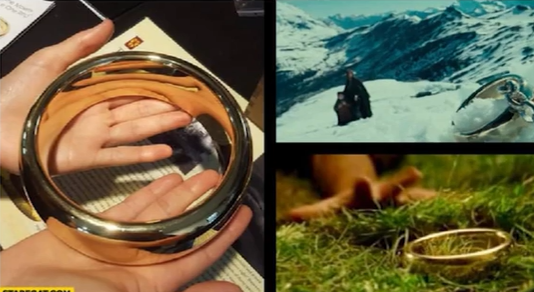

In [5]:
img = cv2.imread('/content/drive/MyDrive/imagem_anel.png')
cv2_imshow(img)

TRANSFORMANDO VARIÁVEIS;
HÁ REGRAS -> NÃO PODEM PERDER A "REGRA" --- ESSÊNCIA/ SIGNIFICADO EM OUTRA ESCALA. TRANSFORMAÇÕES LINEARES.


Transformação de escala -> polegadas, temperatura.
Standard Scaler = Média = 0 e DP = 1
Robust Scaler mediana e intervalo interquartil


Distribuição Normal

Transformar todas variáveis -> 

Análises de componentes principais (PCA)

Matriz de covariância

Redução de dimencionalidade => dificuldade de visualização, dificuldade de interpretar, lentidão do modelo, necessidade de muitos cruzamentos.

Selecionar pela importância da variável.

MANIFOLD LEARNING

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('/content/drive/MyDrive/medical_dataset.csv')

In [12]:
#formato
df.shape

(952, 18)

In [13]:
#cabeçalho
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


Características da base
Linha é uma pessoa;
Coluna tem ou não diabetes ( no momento, para fazer modelo preditivo);
Idade -> Faixa (lógica do negócio categorizado),
Dados relacionados ao desenvolvimento da doença (ida ao médico, diabetes gestacional, histórico familiar de diabetes, variáveis relacionadas a doenças.
Entendimento do problema. Observar as colunas e sua apresentação.

BMI => caso não saiba entrar em contato com os profissionais de negócio, em inglês, índice de massa corpópea.
É calculado dividindo o peso (em kg) pela altura ao quadrado (em metros).
Pdiabetes => Diabetes Gestacional.

Glicemia em jejum ≥ 126 mg/dL ou HbA1c ≥ 6,5% sugerem o diagnóstico de Diabetes Mellitus prévio a gestação. Glicemia de jejum entre 92 mg/dL e 125 mg/dL sugere o diagnóstico de Diabetes Mellitus Gestacional.



In [19]:
df['Diabetic'].value_counts(dropna = False)
#DOPNA = FALSE CONTA OS NA

no     684
yes    266
 no      1
NaN      1
Name: Diabetic, dtype: int64

<Axes: >

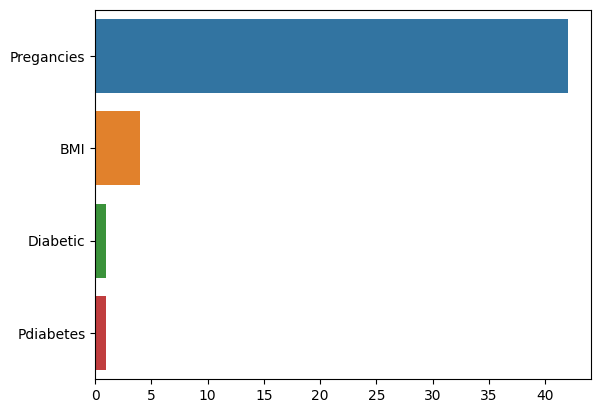

In [25]:

''' Verificando as colunas que mais possuem valores NaN '''
X=df.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)

Avaliando variável resposta 952 pessoas


In [23]:
for col in df.columns:
  print(f'{col:30s}\t{df[col].unique()}')

Age                           	['50-59' '40-49' 'less than 40' '60 or older']
Gender                        	['Male' 'Female']
Family_Diabetes               	['no' 'yes']
highBP                        	['yes' 'no']
PhysicallyActive              	['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
BMI                           	[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. nan 42. 45.]
Smoking                       	['no' 'yes']
Alcohol                       	['no' 'yes']
Sleep                         	[ 8  6 10  7 11  9  4  5]
SoundSleep                    	[ 6  8 10  7 11  4  9  5  3  2  1  0]
RegularMedicine               	['no' 'yes' 'o']
JunkFood                      	['occasionally' 'very often' 'often' 'always']
Stress                        	['sometimes' 'not at all' 'very often' 'always']
BPLevel                       	['high' 'normal' 'low' 'Low' 'High' 'normal ']
Pregancies                    	[ 0.  1.  2

CLASSIFICAÇÃO BINÁRIA SIM E NÃO
REGRESSÃO LOGÍSTICA

--> Acima o código solicita:
para cada coluna no dataframe escreve a coluan ocupando 30 espaços, se houver menos de 30 caracteres e imprime todos valores unicos da coluna.
Ter visualização do DF;
Cuidado quando tiver coluna que possua valores decimais, ou idade sem ser faixa, pode listas as colunas dessa forma:

lista_colunas = {
  'Age'
  'Gender'
}
for col in df.columns:
  print(f'{col:30s}\t{df[col].unique()}')


PADRONIZAÇÃO

In [26]:
df.Diabetic.value_counts(normalize=True)

no     0.719243
yes    0.279706
 no    0.001052
Name: Diabetic, dtype: float64

In [28]:
df.Diabetic.value_counts(normalize = True, dropna= False)

no     0.718487
yes    0.279412
 no    0.001050
NaN    0.001050
Name: Diabetic, dtype: float64

In [30]:
from tables.unimplemented import Unknown
df.Pdiabetes.replace({0: 'unknown'}, inplace = True)
df.Pdiabetes.fillna('unknown', inplace = True)
df.Pdiabetes.value_counts(dropna = False, normalize = True)
#Substituindo 0 por desconhecido
#agregar o não, pouco desconhecido
# uma unica amostra de uma categoria
#substituir do não para desconhecido

0          0.983193
yes        0.014706
unknown    0.001050
no         0.001050
Name: Pdiabetes, dtype: float64

In [32]:

df.Pdiabetes.replace({'no': 'unknown'}, inplace = True)
df.Pdiabetes.value_counts(dropna = False, normalize = False)


0          936
yes         14
unknown      2
Name: Pdiabetes, dtype: int64

In [37]:
df.Pregancies.replace({' 0.0': '0.0'},inplace= True,)

In [38]:
df.Pregancies.value_counts(dropna =False)

0.0    754
2.0     64
3.0     60
NaN     42
1.0     28
4.0      4
Name: Pregancies, dtype: int64

In [41]:
#padronização da pressão sanguiínea
df.BPLevel.replace(
    {
    'High': 'high',
    'Low': 'low',
    'normal': 'normal',

  },
  inplace = True
)

In [43]:
df.BPLevel.value_counts(normalize =True, dropna = False)

normal     0.742647
high       0.226891
low        0.029412
normal     0.001050
Name: BPLevel, dtype: float64

In [44]:
df.RegularMedicine.replace(
    {
        'o': 'no',
        'no': 'no',
    },
    inplace = True,
)

In [45]:
df['RegularMedicine'].value_counts(dropna=False, normalize = True)

no     0.647059
yes    0.352941
Name: RegularMedicine, dtype: float64

ANÁLISE NUMÉRICA

In [46]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


Maior parte das var numéricas

In [47]:
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

se tiver uma linha com espaço ou numero ele ja retrata como número, melhor verificar

<Axes: >

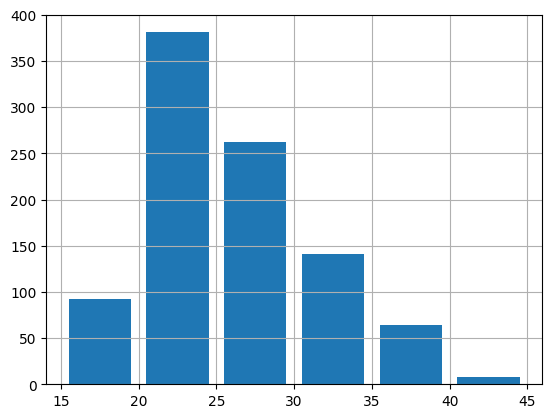

In [50]:
df['BMI'].hist(bins = np.arange(15,45.1,5), rwidth = .8)
#testar quantos bins

<Axes: >

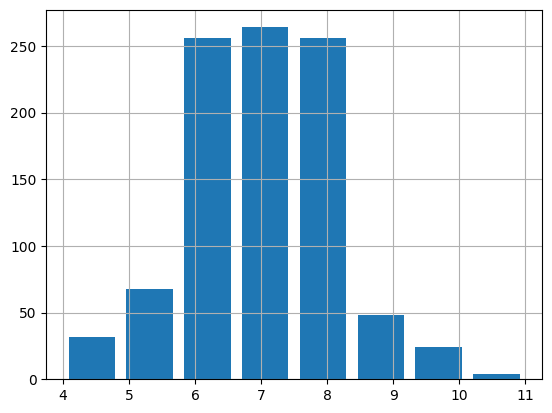

In [51]:
df['Sleep'].hist(bins =8, rwidth = .8)

<Axes: >

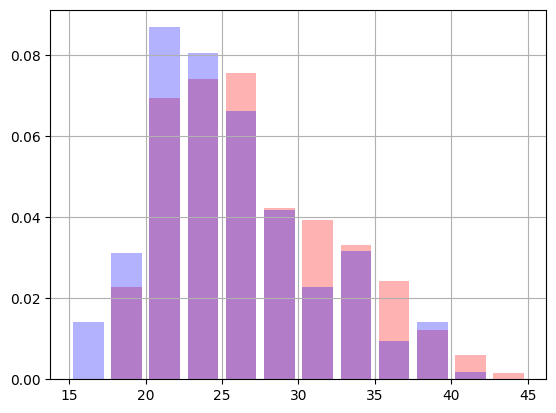

In [54]:
df.loc[df.Diabetic =='yes']['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth = .8, color= 'r', alpha=.3, density=True)
df.loc[df.Diabetic =='no']['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth = .8, color= 'b', alpha=.3, density=True)

<Axes: >

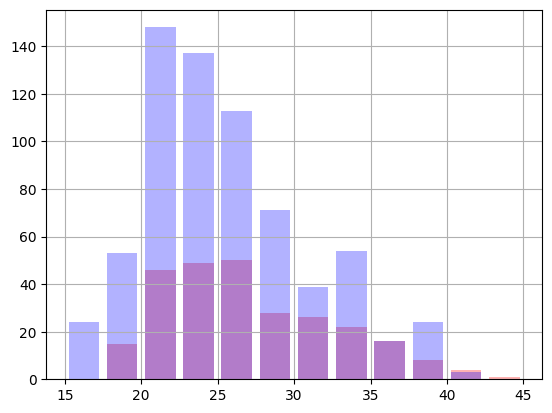

In [55]:
df.loc[df.Diabetic =='yes']['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth = .8, color= 'r', alpha=.3, density=False)
df.loc[df.Diabetic =='no']['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth = .8, color= 'b', alpha=.3, density=False)

<Axes: >

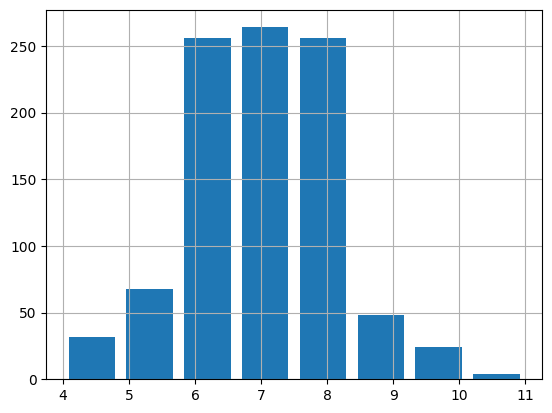

In [56]:
df['Sleep'].hist(bins = 8, rwidth = .8)

<Axes: >

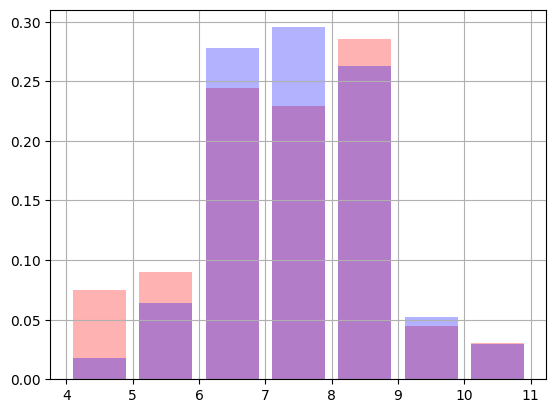

In [58]:
#pessoas que não possuem DM, possuem melhor regularidade no sono/duração
df.loc[df.Diabetic =='yes']['Sleep'].hist(bins=np.arange(4,11.1,1), rwidth = .8, color= 'r', alpha=.3, density=True)
df.loc[df.Diabetic =='no']['Sleep'].hist(bins=np.arange(4,11.1,1), rwidth = .8, color= 'b', alpha=.3, density=True)

<Axes: >

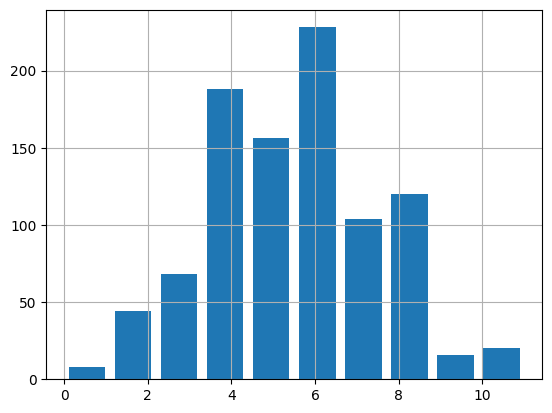

In [59]:
df['SoundSleep'].hist(bins=10, rwidth=.8)